In [1]:
!mkdir data
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip -P data
!unzip -o data/lenta.txt.zip -d data/

--2024-09-25 10:35:57--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip [following]
--2024-09-25 10:35:58--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5723675 (5.5M) [application/zip]
Saving to: ‘data/lenta.txt.zip’

lenta.txt.zip       100%[===================>]   5.46M  --.-KB/s    in 0.1s    

2024-09-25 10:35:59 (42.2 MB/s) - ‘data/lenta.txt.zip’ sa

In [2]:
corpus = open('data/lenta.txt').read()
corpus[:1000]

'Бои у Сопоцкина и Друскеник закончились отступлением германцев. Неприятель, приблизившись с севера к Осовцу начал артиллерийскую борьбу с крепостью. В артиллерийском бою принимают участие тяжелые калибры. С раннего утра 14 сентября огонь достиг значительного напряжения. Попытка германской пехоты пробиться ближе к крепости отражена. В Галиции мы заняли Дембицу. Большая колонна, отступавшая по шоссе от Перемышля к Саноку, обстреливалась с высот нашей батареей и бежала, бросив парки, обоз и автомобили. Вылазки гарнизона Перемышля остаются безуспешными. При продолжающемся отступлении австрийцев обнаруживается полное перемешивание их частей, захватываются новые партии пленных, орудия и прочая материальная часть. На перевале Ужок мы разбили неприятельский отряд, взяли его артиллерию и много пленных и, продолжая преследовать, вступили в пределы Венгрии. \n«Русский инвалид», 16 сентября 1914 года.Министерство народного просвещения, в виду происходящих чрезвычайных событий, признало соответств

In [3]:
import nltk
nltk.download('punkt_tab')
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
import math

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
def ngrammer(tokens, n=2):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

In [6]:
from collections import Counter
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия?

In [7]:
# 1 способ

sentences1 = sent_tokenize(corpus, language='russian')
tokenized_sentences1 = [word_tokenize(sentence) for sentence in sentences1]

tokenized_sentences1[:2]

[['Бои',
  'у',
  'Сопоцкина',
  'и',
  'Друскеник',
  'закончились',
  'отступлением',
  'германцев',
  '.'],
 ['Неприятель',
  ',',
  'приблизившись',
  'с',
  'севера',
  'к',
  'Осовцу',
  'начал',
  'артиллерийскую',
  'борьбу',
  'с',
  'крепостью',
  '.']]

In [8]:
tokenized_sentences1 = [
    [token.lower() for token in sentence if not re.match('\W+', token)] for sentence in tokenized_sentences1
]

tokenized_sentences1[:2]

[['бои',
  'у',
  'сопоцкина',
  'и',
  'друскеник',
  'закончились',
  'отступлением',
  'германцев'],
 ['неприятель',
  'приблизившись',
  'с',
  'севера',
  'к',
  'осовцу',
  'начал',
  'артиллерийскую',
  'борьбу',
  'с',
  'крепостью']]

In [9]:
n5gram_counter1 = Counter()
n5gram_counter_without_stopwords1 = Counter()
for sentence in tokenized_sentences1:
    n5gram_counter1.update(ngrammer(tokens = [token for token in sentence if token not in russian_stopwords], n = 5))
    n5gram_counter_without_stopwords1.update(ngrammer(tokens = sentence, n = 5))

n5gram_counter1.most_common(20)

[('объединенной группировки войск северном кавказе', 83),
 ('сообщает риа новости ссылкой пресс-службу', 57),
 ('обязанности президента россии владимир путин', 47),
 ('группировки федеральных сил северном кавказе', 37),
 ('помощник президента россии сергей ястржембский', 35),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 30),
 ('штабе объединенной группировки федеральных сил', 25),
 ('министр иностранных дел россии игорь', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('иностранных дел россии игорь иванов', 23),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('главного управления борьбе организованной преступностью', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('заместитель начальника генштаба вооруженных сил', 20)

In [10]:
n5gram_counter_without_stopwords1.most_common(20)

[('риа новости со ссылкой на', 400),
 ('сообщает риа новости со ссылкой', 320),
 ('как сообщили риа новости в', 196),
 ('как сообщает риа новости со', 149),
 ('сообщает интерфакс со ссылкой на', 142),
 ('сообщает итар-тасс со ссылкой на', 118),
 ('об этом риа новости сообщили', 113),
 ('об этом сообщает риа новости', 104),
 ('этом риа новости сообщили в', 99),
 ('со ссылкой на источники в', 93),
 ('сообщили риа новости в пресс-службе', 88),
 ('группировки войск на северном кавказе', 84),
 ('как сообщает интерфакс со ссылкой', 83),
 ('объединенной группировки войск на северном', 83),
 ('новости со ссылкой на пресс-службу', 76),
 ('эхо москвы со ссылкой на', 76),
 ('этом сообщает риа новости со', 75),
 ('в связи с тем что', 70),
 ('по борьбе с организованной преступностью', 66),
 ('как сообщает итар-тасс со ссылкой', 58)]

In [11]:
# 2 способ

tokenized_text2 = word_tokenize(corpus, language='russian', preserve_line=True)
tokenized_text2[:20]

['Бои',
 'у',
 'Сопоцкина',
 'и',
 'Друскеник',
 'закончились',
 'отступлением',
 'германцев.',
 'Неприятель',
 ',',
 'приблизившись',
 'с',
 'севера',
 'к',
 'Осовцу',
 'начал',
 'артиллерийскую',
 'борьбу',
 'с',
 'крепостью.']

In [12]:
tokenized_text2 = [
    token.lower() for token in tokenized_text2 if not re.match('\W+', token)
]

tokenized_text2[:20]

['бои',
 'у',
 'сопоцкина',
 'и',
 'друскеник',
 'закончились',
 'отступлением',
 'германцев.',
 'неприятель',
 'приблизившись',
 'с',
 'севера',
 'к',
 'осовцу',
 'начал',
 'артиллерийскую',
 'борьбу',
 'с',
 'крепостью.',
 'в']

In [13]:
n5gram_counter2 = Counter()
n5gram_counter2.update(ngrammer(tokens = list([token for token in tokenized_text2 if token not in russian_stopwords]), n = 5))
n5gram_counter2.most_common(20)

[('сообщает риа новости ссылкой пресс-службу', 57),
 ('объединенной группировки войск северном кавказе', 56),
 ('обязанности президента россии владимир путин', 46),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 29),
 ('объединенной группировки войск северном кавказе.', 27),
 ('министр иностранных дел россии игорь', 24),
 ('штабе объединенной группировки федеральных сил', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('помощник президента россии сергей ястржембский', 21),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('группировки федеральных сил северном кавказе', 20),
 ('заместитель начальника генштаба вооруженных сил', 20),
 ('сообщает федеральное агентство новостей ссылкой'

In [14]:
n5gram_counter_without_stopwords2 = Counter()
n5gram_counter_without_stopwords2.update(ngrammer(tokens = tokenized_text2, n = 5))
n5gram_counter_without_stopwords2.most_common(20)

[('риа новости со ссылкой на', 400),
 ('сообщает риа новости со ссылкой', 320),
 ('как сообщили риа новости в', 196),
 ('как сообщает риа новости со', 149),
 ('сообщает интерфакс со ссылкой на', 142),
 ('сообщает итар-тасс со ссылкой на', 118),
 ('об этом риа новости сообщили', 113),
 ('об этом сообщает риа новости', 104),
 ('этом риа новости сообщили в', 99),
 ('со ссылкой на источники в', 93),
 ('сообщили риа новости в пресс-службе', 88),
 ('как сообщает интерфакс со ссылкой', 83),
 ('объединенной группировки войск на северном', 83),
 ('эхо москвы со ссылкой на', 77),
 ('новости со ссылкой на пресс-службу', 76),
 ('этом сообщает риа новости со', 75),
 ('в связи с тем что', 70),
 ('как сообщает итар-тасс со ссылкой', 58),
 ('группировки войск на северном кавказе', 57),
 ('по борьбе с организованной преступностью', 55)]

Как видим, при использовании 2 способов с удалением стоп-слов, результаты достаточно похожи, но всё же отличаются. А если без удаления стоп-слов, результаты очень близки друг другу, они совсем немного отличаются.

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2022)

Вставьте сюда скриншот

Англицизмы отлично входят в нашу жизнь

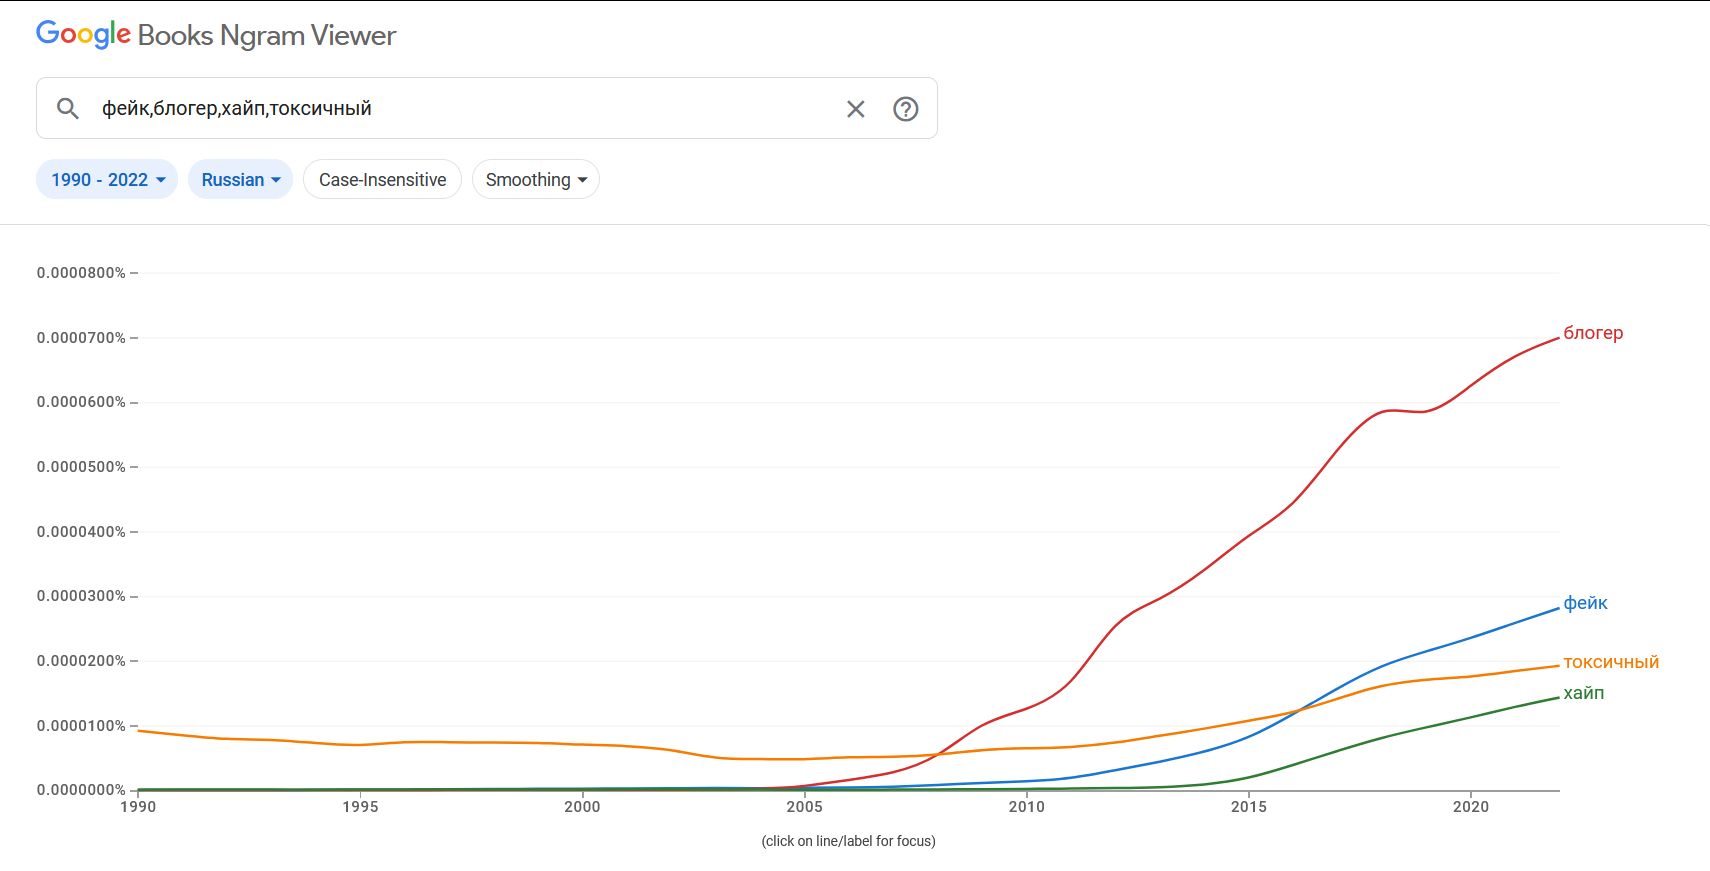

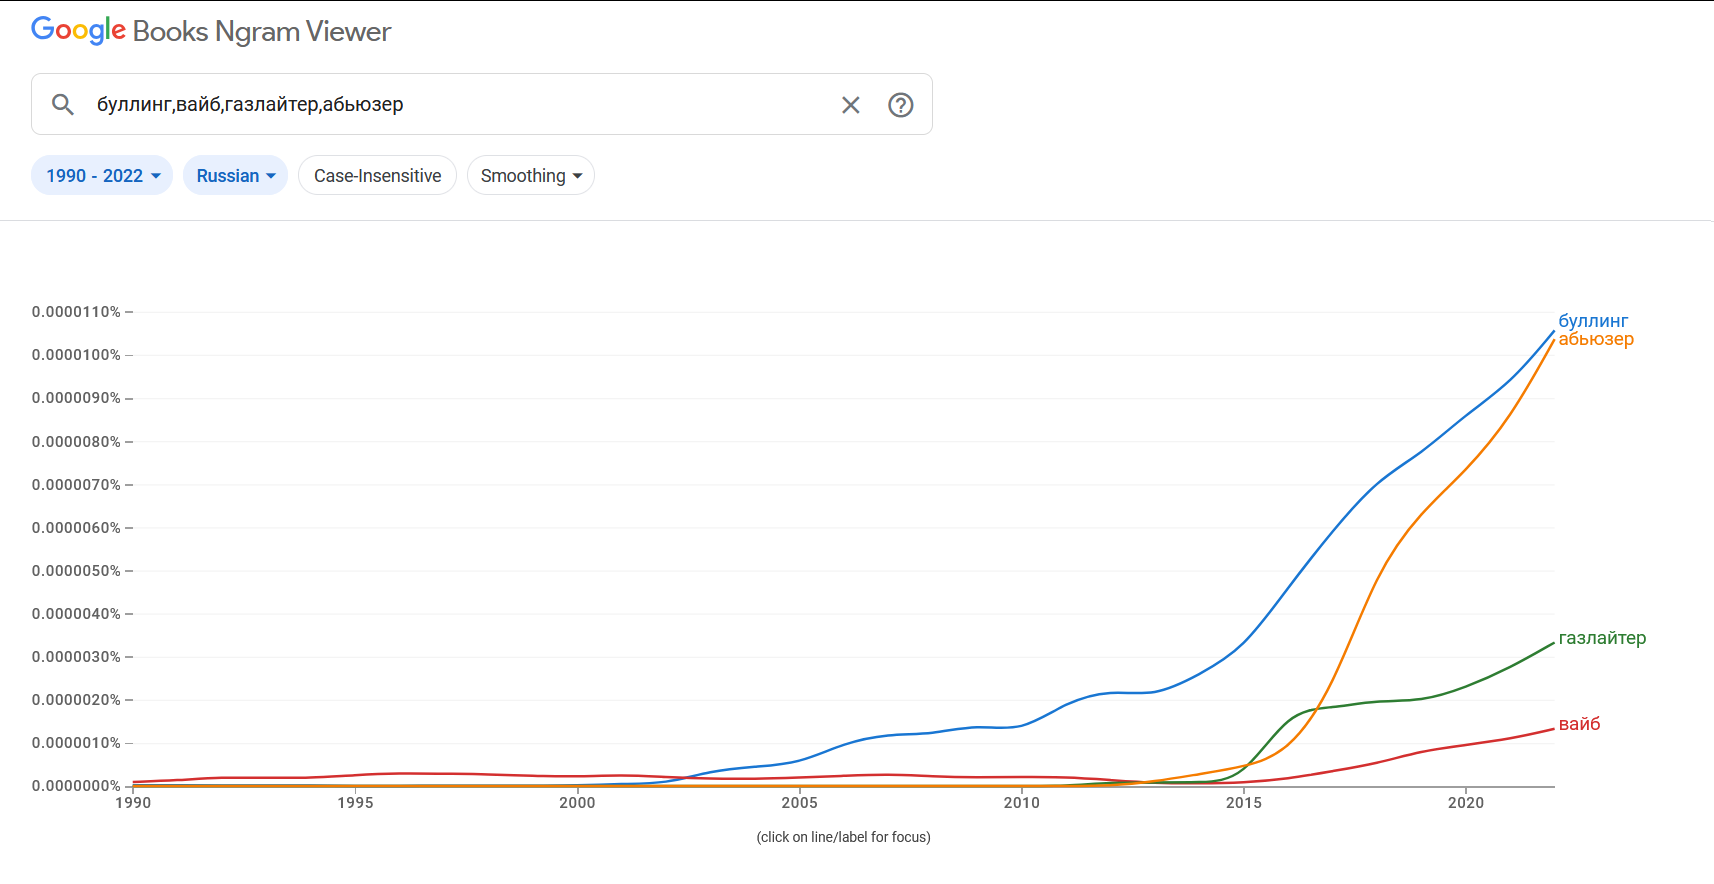

## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [15]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [16]:
def new_scorer(word_count_a, word_count_b, bigram_count, min_count=0):
    try:
        score = ((bigram_count - min_count) / ((word_count_a + word_count_b)))
    except ZeroDivisionError:
        return 0

    return score

def ngrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0, len(tokens) - n + 1):
        ngrams.append(' '.join(tokens[i:i + n]))
    return ngrams

# Соберём статистику для каждого слова и биграмы
def collect_stats(corpus, stops):
    unigrams = Counter()
    bigrams = Counter()

    for sentence in corpus:
        unigrams.update(sentence)
        bigrams.update(ngrammer(sentence, 2, stops))

    return unigrams, bigrams

# Добавим параметр min_count, относительно того, что было в семинаре
def score_bigrams(unigrams, bigrams, scorer, threshold=-100000, min_count=0):
    ## Посчитаем метрику для каждого нграмма
    bigram2score = Counter()

    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], bigrams[bigram], min_count)

        ## Если метрика выше порога, добавляем в словарик
        if score > threshold:
            bigram2score[bigram] = score

    return bigram2score

unigrams, bigrams = collect_stats(tokenized_sentences1, russian_stopwords)
bigram2score = score_bigrams(unigrams, bigrams, new_scorer, min_count=20)
bigram2score.most_common(10)

[('риа новости', 0.4900746163592848),
 ('северном кавказе', 0.44553483807654565),
 ('associated press', 0.4345991561181435),
 ('new york', 0.4218009478672986),
 ('сих пор', 0.39092055485498106),
 ('взрывное устройство', 0.3665768194070081),
 ('таким образом', 0.3657187993680885),
 ('рао еэс', 0.33954451345755693),
 ('доменных имен', 0.31512605042016806),
 ('чрезвычайным ситуациям', 0.30935251798561153)]

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов.

In [19]:
def scorer_pmi(word_count_a, word_count_b, bigram_count, total_words):
    return math.log2(bigram_count / total_words) - (math.log2(word_count_a / total_words) + math.log2(word_count_b / total_words))

def score_bigrams_pmi(unigrams, bigrams, total_words, min_count = 0):
    bigram_score = Counter()

    for bigram, count in bigrams.items():
        word_a, word_b = bigram.split()
        pmi = scorer_pmi(unigrams[word_a], unigrams[word_b], count, total_words)

        if pmi > 0:
            bigram_score[bigram] = pmi

    return bigram_score

total_words = sum(unigrams.values())
bigram_score_pmi = score_bigrams_pmi(unigrams, bigrams, total_words, min_count = 20)
bigram_score_pmi.most_common(10)

[('сопоцкина друскеник', 20.510568127854185),
 ('неприятель приблизившись', 20.510568127854185),
 ('саноку обстреливалась', 20.510568127854185),
 ('м.ю лермонтова', 20.510568127854185),
 ('австрийский аэроплан', 20.510568127854185),
 ('показывался аэроплан-птица', 20.510568127854185),
 ('das ist', 20.510568127854185),
 ('ist nesteroff', 20.510568127854185),
 ('песнь нестерове', 20.510568127854185),
 ('могучий унесся', 20.510568127854185)]

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы

In [22]:
from gensim.models.phrases import Phrases

help(Phrases)

Help on class Phrases in module gensim.models.phrases:

class Phrases(_PhrasesTransformation)
 |  Phrases(sentences=None, min_count=5, threshold=10.0, max_vocab_size=40000000, delimiter='_', progress_per=10000, scoring='default', connector_words=frozenset())
 |  
 |  Detect phrases based on collocation counts.
 |  
 |  Method resolution order:
 |      Phrases
 |      _PhrasesTransformation
 |      gensim.interfaces.TransformationABC
 |      gensim.utils.SaveLoad
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sentences=None, min_count=5, threshold=10.0, max_vocab_size=40000000, delimiter='_', progress_per=10000, scoring='default', connector_words=frozenset())
 |      Parameters
 |      ----------
 |      sentences : iterable of list of str, optional
 |          The `sentences` iterable can be simply a list, but for larger corpora, consider a generator that streams
 |          the sentences directly from disk/network, See :class:`~gensim.models.word2vec.Br

Видим следующее:
`scoring : {'default', 'npmi', function}, optional`

Проверим на дефолтном.

In [23]:
default_scoring = Phrases(tokenized_sentences1, min_count=20, scoring="default", delimiter=" ")
phrase_score = Counter(default_scoring.export_phrases())
phrase_score.most_common(10)

[('wall street', 9993.185185185186),
 ('саудовской аравии', 9911.444378346223),
 ('street journal', 8796.08487654321),
 ('dow jones', 8639.42857142857),
 ('подписных листов', 8364.72496025437),
 ('следственном изоляторе', 8231.787549407114),
 ('чрезвычайным ситуациям', 7810.021955260977),
 ('france presse', 7707.146484375),
 ('персидском заливе', 7676.583164983164),
 ('полевые командиры', 7672.892500000001)]

In [25]:
# Для npmi обязательно нужно указать threshld от -1 до 1
npmi_scoring = Phrases(tokenized_sentences1, min_count=20, scoring="npmi", delimiter=" ", threshold=0.5)
phrase_score_npmi = Counter(npmi_scoring.export_phrases())
phrase_score_npmi.most_common(10)

[('dow jones', 0.9967760691772763),
 ('exit polls', 0.9964338214125783),
 ('wall street', 0.9963236116179338),
 ('риа новости', 0.995285953928321),
 ('норильский никель', 0.9926038996026336),
 ('саудовской аравии', 0.9905222989112752),
 ('new york', 0.9861815558365328),
 ('подписные листы', 0.9860355438566462),
 ('ak m', 0.986004496354122),
 ('северном кавказе', 0.9820691855789901)]

In [27]:
# Увеличим min_count до 40
npmi_scoring = Phrases(tokenized_sentences1, min_count=40, scoring="npmi", delimiter=" ", threshold=0.5)
phrase_score_npmi = Counter(npmi_scoring.export_phrases())
phrase_score_npmi.most_common(10)

[('wall street', 0.9963236116179338),
 ('риа новости', 0.995285953928321),
 ('new york', 0.9861815558365328),
 ('северном кавказе', 0.9820691855789901),
 ('associated press', 0.9818890021904133),
 ('чрезвычайным ситуациям', 0.9805515372859319),
 ('street journal', 0.9804680075917059),
 ('полевые командиры', 0.9682471049971425),
 ('france presse', 0.9681876533405096),
 ('полевых командиров', 0.9659164753747027)]

In [28]:
# Поменяем threshold до 0
npmi_scoring = Phrases(tokenized_sentences1, min_count=40, scoring="npmi", delimiter=" ", threshold=0)
phrase_score_npmi = Counter(npmi_scoring.export_phrases())
phrase_score_npmi.most_common(10)

[('wall street', 0.9963236116179338),
 ('риа новости', 0.995285953928321),
 ('new york', 0.9861815558365328),
 ('северном кавказе', 0.9820691855789901),
 ('associated press', 0.9818890021904133),
 ('чрезвычайным ситуациям', 0.9805515372859319),
 ('street journal', 0.9804680075917059),
 ('полевые командиры', 0.9682471049971425),
 ('france presse', 0.9681876533405096),
 ('полевых командиров', 0.9659164753747027)]

In [37]:
# Теперь попробуем триграмы
npmi_bigram = Phrases(tokenized_sentences1, min_count=5, scoring="npmi", delimiter=" ", threshold=0.5)
npmi_trigram = Phrases(npmi_bigram[tokenized_sentences1], min_count=5, scoring="npmi", delimiter=" ", threshold=0.5)

phrase_score = Counter(npmi_trigram.export_phrases())
phrase_score.most_common(10)

[('со ссылкой', 1.8779945369185327),
 ('риа новости со ссылкой', 1.8364266493330739),
 ('сообщает риа', 1.779894301325786),
 ('риа новости', 1.7633904209997873),
 ('передает риа', 1.6698080034795602),
 ('об этом', 1.6598556813005996),
 ('кроме того', 1.643292566942923),
 ('возбуждено уголовное', 1.5807446586758425),
 ('саудовской аравии', 1.5781144103073728),
 ('до сих', 1.560215522615324)]